# Simple Neural Network used to Estimate Rock Types
### Introduction
#### Predict Macro, Meso and Micro Rock Types (RT)
The objective of this project is to estimate Macro, Meso and Micro Rock Types (RTs). In this repository we are using a simple this single layer neural network to predict our RT. Therefore, we modified the Petrophysical Rock Types (PRT) as defined by Clerke(1) for the Arab-D carbonate reservoir. The objective is to use just Porosity and Permeability to estimate our Macro, Meso or Micro RT.

The Arab D data set published by Clerke is quite distinctive. Clerke acquired nearly 450 High Pressure Mercury Injection Capillary Pressure (HPMI) measurements in the Arab D reservoir; however, Clerke's final samples were randomly selected from 1,000's of pre-qualified core samples ensuring a broad distribution and representation of all Petrophysical properties. This created one of the best Core Analysis datasets every collected in our industry. 

Clerke began evaluating this dataset by fitting a Thomeer hyperbolas for each pore system in each sample to generate the published Thomeer Capillary Pressure parameters. From these data Clerke established his Petrophysical Rock Types (PRT) based on the Initial Displacement Pressures for each pore system and the number of pore systems present in each sample. From the figure below it is rather evident that Clerke's PRTs are Petrophysically well-defined in poro-perm space where each color represents a different PRT.  The Capillary Pressure curves and Pore Throat Distributions (PTD) shown on the right hand side of the figure illustrate the unique characteristics of each PRT. 

![TS_Image](PRT.png)

###### The characterization of Clerke's PRTs are shown below:

![TS_Image](Rock-Types.png)

As can be seen in the first figure above, the PRTs are rather well segregated in the Porosity vs. Permeability Cross Plot as they fall in distinct regions or clusters on the Cross Plot.For modeling purposes it is important to take advantage of the excellent correlations between the PRTs. 

The first part of this notebook develops our single layer neural network as inspired by the video series from giant_neural_network on YouTube. 

https://www.youtube.com/watch?v=LSr96IZQknc

We used Clerke's Rosetta Stone data and his PRTs as our training set, except that we combined all the macros PRTs into one RT that had a value of 2. We combined all the Type 1 Meso PRT into a RT with a value of 1 and all the Micro PRT compose our third RT with a value of 0. The following is the standard Sigmoid s-curve.
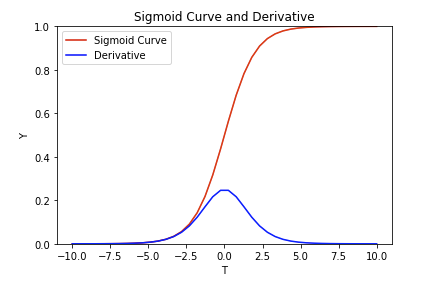

To accomodate our 3 RT we expanded the standard Sigmoid curve to read from 0 to 2 and not 0 to 1 as shown above. This is the code for the expanded Sigmoid curve and the differential Sigmoid curve. 

    #Sigmoid curve expanded for 0,1 and 2 RTs
    def sigmoid(x):
        return 2/(1 + np.exp(-x))
        
    #derivative of sigmoid curve expanded for 0, 1 and 2 RTs
    def sigmoid_p(x):
        return sigmoid(x) * (2 - sigmoid(x))

We first calculate a variable z which is a function if weights and bias:
        
        z = Porosity * weight1 + permeability * weight2 + bias

Our prediction (pred) is then a function of sigmoid:        
        
        pred = sigmoid(z) 

where expanded sigmoid is defined by:
        
        def sigmoid(x):
            return 2/(1 + np.exp(-x))

The term z is actually the x-axis on the above sigmoid curve, and y is a function of sigmoid(z). 

For training we make about 1,000 iterations to optimize on the weights (w1 and w2) and bias for our single layer. These weights can be saved and then used in future projects to estimate RT from the user's input of Porosity and log10 of Permeability. We can calculates the most probable Rock Type and even provide Capillary Pressure curves for each Rock Type.

In this example z is calculated:
        
        z = porosity * weight1 + permeability * weight2 + bias
        z = Porosity * -1.0235 + permeability * 1.82953 + 0.232

where:
    
    w1 = -1.02356705997058    , w2 = 1.8295362794101309 , bias = 0.2326021841348133

and then pred is a function of sigmoid(z). 
        
        pred = sigmoid(z) 

The final RT are defined as shown below:
        
        if pred > 1.7:
            RT=2
        elif pred < 0.25:
            RT=0
        else:
            RT=1
            
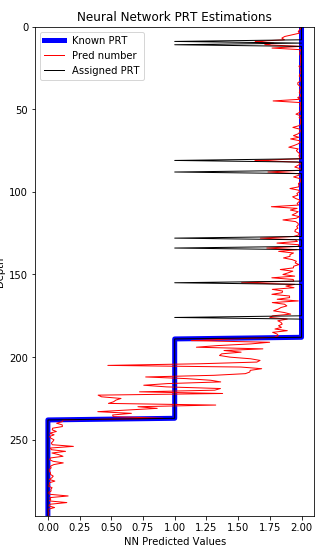


1 Clerke, E. A., Mueller III, H. W., Phillips, E. C., Eyvazzadeh, R. Y., Jones, D. H., Ramamoorthy, R., Srivastava, A., (2008) “Application of Thomeer Hyperbolas to decode the pore systems, facies and reservoir properties of the Upper Jurassic Arab D Limestone, Ghawar field, Saudi Arabia: A Rosetta Stone approach”, GeoArabia, Vol. 13, No. 4, p. 113-160, October, 2008. 



## Neural Network Code:

In [1]:
# Initiated from giant_neural_network video series on Neural Networks
# https://www.youtube.com/watch?v=LSr96IZQknc

%matplotlib inline

from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
import os            # for sound


Bad key "text.kerning_factor" on line 4 in
/Users/craig/opt/anaconda3/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test_patch.mplstyle.
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.1.3/matplotlibrc.template
or from the matplotlib source distribution


### Load Clerke's Rosetta Stone Arab D Core Database with Porosity, log10 Permeability and Petrophysical Rock Types (PRT) as Training set:

In [2]:
# This is the Rosetta Stone Arab D Carbonate PRT dataset. For permeability 
# we are using the log10 of perm
data = [[0.2581,	3.681241237,	2],
     [0.3005,	3.190331698,	2],
     [0.30712,	2.716832305,	2],
     [0.2208,	2.369215857,	2],
     [0.24874,	2.635687174,	2],
     [0.2829,	1.799340549,	2],
     [0.2458,	1.458184436,	2],
     [0.26601,	1.374038602,	2],
     [0.17585,	1.409627151,	2],
     [0.17163,	0.787176992,	2],
     [0.23504,	1.148951061,	2],
     [0.23497,	0.973127854,	2],
     [0.23883,	3.003029471,	2],
     [0.15677,	1.068352866,	2],
     [0.26043,	3.308479574,	2],
     [0.24874,	2.837537557,	2],
     [0.21448,	2.662757832,	2],
     [0.2128,	2.728669038,	2],
     [0.25472,	3.293573551,	2],
     [0.2519,	2.970811611,	2],
     [0.2823,	3.074084689,	2],
     [0.26075,	2.933643262,	2],
     [0.27417,	3.217992192,	2],
     [0.28101,	3.503125049,	2],
     [0.26869,	2.515873844,	2],
     [0.2666,	2.908991395,	2],
     [0.22247,	2.826450014,	2],
     [0.13719,	3.258229108,	2],
     [0.23313,	3.277971853,	2],
     [0.25857,	2.702239198,	2],
     [0.1207,	2.5040368,	2],
     [0.27999,	3.237898443,	2],
     [0.28829,	2.94792362,	2],
     [0.20943,	2.94377678,	2],
     [0.24136,	2.308980369,	2],
     [0.22121,	2.297311107,	2],
     [0.16211,	2.656910512,	2],
     [0.3033,	3.174059808,	2],
     [0.26963,	2.780869516,	2],
     [0.2546,	2.716837723,	2],
     [0.2413,	2.592176757,	2],
     [0.25199,	2.853698212,	2],
     [0.21959,	3.254537678,	2],
     [0.20035,	2.271682259,	2],
     [0.2382,	2.809718658,	2],
     [0.09455,	1.057273845,	2],
     [0.25321,	3.27525925,	2],
     [0.18353,	3.011728588,	2],
     [0.26478,	2.782472624,	2],
     [0.18773,	3.095660088,	2],
     [0.27869,	3.152518643,	2],
     [0.27877,	2.809677598,	2],
     [0.2694,	2.653212514,	2],
     [0.20536,	2.06069784,	2],
     [0.2506,	3.378397901,	2],
     [0.21637,	2.539581519,	2],
     [0.30702,	3.028157826,	2],
     [0.23431,	3.05956564,	2],
     [0.2669,	3.06069784,	2],
     [0.285,	2.954261135,	2],
     [0.2587,	2.512158416,	2],
     [0.12281,	1.770082851,	2],
     [0.20317,	2.60072445,	2],
     [0.2932,	3.006037955,	2],
     [0.2122,	2.732637138,	2],
     [0.2635,	2.307496038,	2],
     [0.19046,	1.845711823,	2],
     [0.266,	2.532812069,	2],
     [0.24402,	1.704502273,	2],
     [0.22574,	2.547154316,	2],
     [0.28528,	2.909581541,	2],
     [0.24049,	2.339174279,	2],
     [0.23861,	1.902900485,	2],
     [0.20289,	1.595273506,	2],
     [0.28408,	2.392521442,	2],
     [0.28165,	2.151872507,	2],
     [0.2109,	2.290034611,	2],
     [0.28621,	2.822842282,	2],
     [0.20421,	2.493144102,	2],
     [0.2375,	2.624282096,	2],
     [0.14958,	2.848276491,	2],
     [0.18262,	0.79030628,	2],
     [0.21765,	2.276461804,	2],
     [0.16129,	3.104751977,	2],
     [0.27765,	2.336342038,	2],
     [0.14645,	1.922165132,	2],
     [0.28101,	2.95568775,	2],
     [0.24966,	2.597177233,	2],
     [0.15558,	0.987397205,	2],
     [0.22968,	2.61246024,	2],
     [0.29316,	2.474502396,	2],
     [0.14331,	1.829571923,	2],
     [0.27907,	2.806727925,	2],
     [0.1471,	2.947030857,	2],
     [0.23407,	2.955771956,	2],
     [0.28511,	2.428619378,	2],
     [0.2419,	2.499687083,	2],
     [0.2407,	2.445604203,	2],
     [0.2058,	1.650974677,	2],
     [0.30438,	2.515873844,	2],
     [0.21314,	2.593286067,	2],
     [0.20182,	2.162129297,	2],
     [0.21221,	2.324521149,	2],
     [0.13386,	1.759756281,	2],
     [0.27599,	2.070765762,	2],
     [0.2356,	2.720985744,	2],
     [0.26491,	2.547404598,	2],
     [0.25731,	2.225309282,	2],
     [0.24968,	2.44193193,	2],
     [0.17471,	1.065949249,	2],
     [0.24238,	2.221953836,	2],
     [0.17122,	1.650595014,	2],
     [0.10813,	2.294078716,	2],
     [0.25143,	2.063882917,	2],
     [0.20535,	1.767125427,	2],
     [0.1678,	2.582496305,	2],
     [0.2296,	2.096910013,	2],
     [0.12388,	1.329139463,	2],
     [0.25774,	2.056089594,	2],
     [0.25352,	2.349682874,	2],
     [0.24822,	2.392362752,	2],
     [0.2432,	2.164352856,	2],
     [0.26734,	2.336482148,	2],
     [0.25612,	2.026962852,	2],
     [0.1401,	1.92992956,	2],
     [0.29156,	2.502134624,	2],
     [0.26973,	2.526224614,	2],
     [0.20156,	1.862662588,	2],
     [0.17486,	0.867285364,	2],
     [0.25772,	2.022192394,	2],
     [0.26617,	2.265244827,	2],
     [0.22157,	1.217483944,	2],
     [0.26896,	2.471967569,	2],
     [0.29412,	2.429496148,	2],
     [0.19843,	0.989965681,	2],
     [0.32759,	2.261364946,	2],
     [0.13006,	1.208922952,	2],
     [0.24946,	1.883547879,	2],
     [0.23944,	1.667926216,	2],
     [0.19178,	1.646459603,	2],
     [0.21693,	1.399569894,	2],
     [0.26512,	1.805500858,	2],
     [0.25179,	2.130845613,	2],
     [0.2547,	2.021189299,	2],
     [0.24347,	2.507682254,	2],
     [0.2441,	1.892651034,	2],
     [0.13826,	1.813187677,	2],
     [0.14356,	1.261122682,	2],
     [0.2159,	1.819807065,	2],
     [0.20494,	1.566980463,	2],
     [0.2513,	1.400653671,	2],
     [0.2618,	1.979275148,	2],
     [0.2372,	1.110010265,	2],
     [0.27877,	1.88003631,	2],
     [0.26864,	1.903089987,	2],
     [0.15183,	0.598925041,	2],
     [0.2655,	1.990517776,	2],
     [0.2486,	1.501059262,	2],
     [0.29499,	1.944482672,	2],
     [0.18534,	1.091026473,	2],
     [0.26221,	1.396331883,	2],
     [0.1967,	1.344392274,	2],
     [0.1692,	1.073481164,	2],
     [0.17931,	1.615421847,	2],
     [0.22987,	1.646455584,	2],
     [0.21783,	1.220390549,	2],
     [0.1411,	2.342789702,	2],
     [0.23949,	1.120705516,	2],
     [0.16332,	1.404833717,	2],
     [0.28778,	1.558708571,	2],
     [0.24851,	1.338456494,	2],
     [0.20057,	1.232627693,	2],
     [0.19826,	1.125939717,	2],
     [0.26576,	1.449157381,	2],
     [0.1836,	1.677227235,	2],
     [0.26025,	1.142085855,	2],
     [0.12588,	1.006810774,	2],
     [0.268,	1.56205483,	2],
     [0.26883,	1.264581729,	2],
     [0.27791,	1.3588748,	2],
     [0.3197,	1.416633851,	2],
     [0.23227,	1.263256516,	2],
     [0.28144,	1.371067862,	2],
     [0.2377,	1.178976947,	2],
     [0.2894,	1.577836341,	2],
     [0.2264,	1.120573931,	2],
     [0.25738,	1.238693297,	2],
     [0.2499,	1.269512944,	2],
     [0.26269,	1.178976947,	2],
     [0.19444,	0.537201833,	1],
     [0.12288,	0.085004999,	1],
     [0.23645,	1.065307028,	1],
     [0.18473,	0.734253218,	1],
     [0.12464,	0.331366552,	1],
     [0.15144,	0.146447435,	1],
     [0.20054,	0.922938143,	1],
     [0.1708,	0.417006425,	1],
     [0.19947,	0.620052729,	1],
     [0.2114,	0.416640507,	1],
     [0.15194,	0.36152008,	1],
     [0.1784,	0.482430492,	1],
     [0.19911,	0.740299515,	1],
     [0.25165,	0.906405084,	1],
     [0.19523,	0.825549442,	1],
     [0.17446,	0.197280558,	1],
     [0.10627,	-0.70863115,	1],
     [0.17964,	0.606284606,	1],
     [0.213,	0.910058493,	1],
     [0.20239,	0.73600586,	1],
     [0.19628,	0.727101861,	1],
     [0.20068,	0.672531935,	1],
     [0.16541,	0.315046225,	1],
     [0.10507,	-0.323096151,	1],
     [0.18577,	0.078184846,	1],
     [0.21323,	0.311923309,	1],
     [0.20258,	0.401863886,	1],
     [0.17639,	-0.089306242,	1],
     [0.162,	-0.308874285,	1],
     [0.17524,	-0.100425704,	1],
     [0.18278,	0.388083431,	1],
     [0.208,	0.346352974,	1],
     [0.10771,	-0.378615972,	1],
     [0.19887,	0.418798291,	1],
     [0.08314,	-0.844572861,	1],
     [0.08201,	-0.800793521,	1],
     [0.1495,	-0.537497185,	1],
     [0.11913,	-0.608888386,	1],
     [0.09782,	-0.646853454,	1],
     [0.07406,	-0.719649307,	1],
     [0.18017,	0.340563083,	1],
     [0.1016,	-0.396574131,	1],
     [0.10141,	-0.222065951,	1],
     [0.08536,	-0.503374741,	1],
     [0.08977,	-0.845667339,	1],
     [0.12583,	-0.445631999,	1],
     [0.09297,	-0.659952682,	1],
     [0.08825,	-0.656985503,	1],
     [0.05323,	-0.198870812,	1],
     [0.09092,	-1.580870692,	0],
     [0.07967,	-1.612610174,	0],
     [0.07891,	-1.906578315,	0],
     [0.06848,	-1.626352528,	0],
     [0.10636,	-1.599807511,	0],
     [0.04063,	-2.274088368,	0],
     [0.04798,	-2.310691141,	0],
     [0.08337,	-1.919373513,	0],
     [0.04468,	-2.785156152,	0],
     [0.06392,	-2.102372909,	0],
     [0.03289,	-2.821023053,	0],
     [0.06432,	-2.530177984,	0],
     [0.06147,	-2.118045029,	0],
     [0.04534,	-2.236572006,	0],
     [0.06514,	-2.432973634,	0],
     [0.06551,	-2.295849483,	0],
     [0.09554,	-1.27083521,	0],
     [0.04656,	-2.657577319,	0],
     [0.04783,	-2.428291168,	0],
     [0.07418,	-1.502655619,	0],
     [0.07279,	-2.334419009,	0],
     [0.04138,	-1.804100348,	0],
     [0.09134,	-1.584525832,	0],
     [0.05314,	-2.600326279,	0],
     [0.0522,	-2.818156412,	0],
     [0.04546,	-2.239577517,	0],
     [0.07104,	-1.585026652,	0],
     [0.04472,	-2.13667714,	0],
     [0.06622,	-2.614393726,	0],
     [0.03942,	-2.468521083,	0],
     [0.05897,	-3.050609993,	0],
     [0.03647,	-2.89279003,	0],
     [0.02819,	-2.605548319,	0],
     [0.05365,	-2.586700236,	0],
     [0.04293,	-2.200659451,	0],
     [0.0598,	-2.356547324,	0],
     [0.02669,	-2.995678626,	0],
     [0.04077,	-2.050609993,	0],
     [0.02758,	-2.91721463,	0],
     [0.03258,	-2.8569852,	0],
     [0.03599,	-3.823908741,	0],
     [0.02939,	-2.346787486,	0],
     [0.02311,	-2.537602002,	0],
     [0.02897,	-2.477555766,	0],
     [0.03747,	-3.823908741,	0],
     [0.05834,	-2.732828272,	0],
     [0.04553,	-1.437826137,	0],
     [0.03918,	-2.749579998,	0],
     [0.04457,	-2.542118103,	0],
     [0.03517,	-2.982966661,	0],
     [0.05956,	-1.469928431,	0],
     [0.03586,	-2.68613278,	0],
     [0.03485,	-3.251811973,	0],
     [0.01689,	-2.088842391,	0],
     [0.01512,	-3.698970004,	0],
     [0.02057,	-3.886056648,	0],
     [0.02062,	-3.096910013,	0],
     [0.02185,	-3.443697499,	0],
     [0.01889,	-3.148741651,	0]]



#data=pd.read_csv('RosettaStone_PRT_training.csv')
#data=pd.read_table('RosettaStone_PRT_training.txt', delim_whitespace=True)
#data

### Create Scatter Plot of Porosity vs. Permeability with PRT color z-axis:

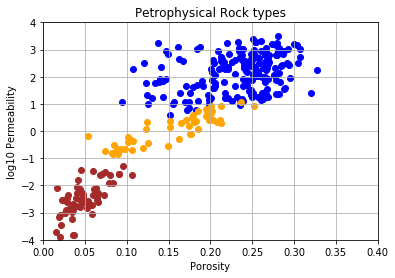

In [3]:
# scatter plot of flowers
plt.axis([0, .4, -4, 4])
plt.grid()
for i in range(1,len(data)):
    point = data[i]
    color = "brown"
    if point[2] > .95 :
        color = "orange"
    
    if point[2] > 1.7 :
        color = "blue"
    plt.scatter(point[0],point[1], c=color)
    plt.xlabel("Porosity")
    plt.ylabel("log10 Permeability")
    plt.title("Petrophysical Rock types")

### This is a very simple, one layer Neural Network:

In [4]:
# Neural Network

#   o     Petrophysical Rock Type (PRT)
#  / \    layer weight w1, w2 and bias parameters 
# o   o   Porosity, log10 Permeability
#

### We use a Sigmoid S-curve function and its derivative in our Neural Network:

#### Define Sigmoid Curve and Derivative of Sigmoid Curve:

In [5]:
def sigmoid(x):
    return 2/(1 + np.exp(-x))


# Derivative of sigmoid
def sigmoid_p(x):
    return sigmoid(x) * (2 - sigmoid(x))


### Sigmoid Curve in red and derivative in blue:

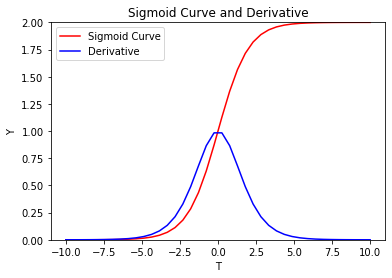

In [17]:
T = np.linspace(-10, 10, 40)
Y = sigmoid(T)

plt.plot(T,Y, c='r', label = "Expanded Sigmoid Curve")
plt.plot(T,sigmoid_p(T), c='b', label = "Derivative")
plt.ylim(0,2)
plt.xlabel("T")
plt.ylabel("Y")
plt.title("Sigmoid Curve and Derivative")
plt.legend()

## Neural Network Training Loop with Plots of Cost functions:

Text(0.5, 1.0, 'Neural Network Cost Function')

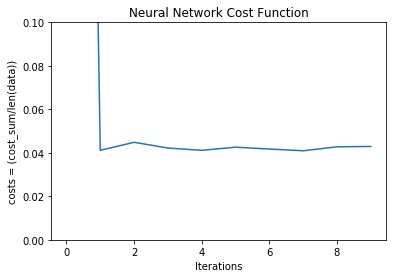

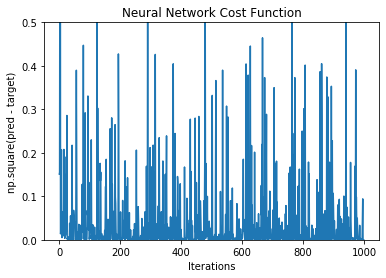

In [7]:
# Start our training loop

learning_rate = 0.1
costs = []
cost_all = []

w1 = np.random.randn()
w2 = np.random.randn()
b  = np.random.randn()

# Save weights from previous run. These can be loaded to continue from there
#w1 = 21.5
#w2 = 10.5
#b  = -77

for i in range(1000):
    ri = np.random.randint(len(data))
    point = data[ri]

    z = point[0]*w1 + point[1]*w2 + b
    pred = sigmoid(z)
    
    target = point[2]
    cost = np.square(pred - target)
    
    cost_all.append(cost)
    
    ###costs.append(cost)
    
    #derivatives
    dcost_pred = 2 * (pred - target)
    dpred_dz   = sigmoid_p(z)
    dz_dw1 = point[0]
    dz_dw2 = point[1]
    dz_db  = 1
    
    dcost_dw1 = dcost_pred * dpred_dz * dz_dw1
    dcost_dw2 = dcost_pred * dpred_dz * dz_dw2
    dcost_db  = dcost_pred * dpred_dz * dz_db
    
    w1 = w1 - learning_rate * dcost_dw1
    w2 = w2 - learning_rate * dcost_dw2
    b  = b  - learning_rate * dcost_db
    
    if i % 100==0:
        cost_sum = 0
        for j in range(len(data)):
            point = data[j]
            
            z = point[0]*w1 + point[1]*w2 + b
            pred = sigmoid(z)
            
            target=point[2]
            cost_sum += np.square(pred - target)
            
        costs.append(cost_sum/len(data))
        #costs.append(cost_sum)

plt.figure(1)   
plt.plot(costs)
plt.ylim(0,.1)
plt.xlabel("Iterations")
plt.ylabel("costs = (cost_sum/len(data))")
plt.title("Neural Network Cost Function")

plt.figure(2)
plt.plot(cost_all)
plt.ylim(0,0.5)
plt.xlabel("Iterations")
plt.ylabel("np.square(pred - target)")
plt.title("Neural Network Cost Function")

### Make Predictions from the Training set:

In [8]:
for i in range(len(data)):
    point = data[i]
    print(point)
    z = point[0] * w1 + point[1]* w2 + b
    pred = sigmoid(z)
    print("pred: {}".format(pred))
    

[0.2581, 3.681241237, 2]
pred: 1.9975494988970752
[0.3005, 3.190331698, 2]
pred: 1.993729135436611
[0.30712, 2.716832305, 2]
pred: 1.98505147564888
[0.2208, 2.369215857, 2]
pred: 1.9742920516910913
[0.24874, 2.635687174, 2]
pred: 1.9836762407408555
[0.2829, 1.799340549, 2]
pred: 1.9242602580763386
[0.2458, 1.458184436, 2]
pred: 1.8678753051167605
[0.26601, 1.374038602, 2]
pred: 1.84462311528403
[0.17585, 1.409627151, 2]
pred: 1.865732123259762
[0.17163, 0.787176992, 2]
pred: 1.6342819809580418
[0.23504, 1.148951061, 2]
pred: 1.7806510768753505
[0.23497, 0.973127854, 2]
pred: 1.7095284825545018
[0.23883, 3.003029471, 2]
pred: 1.991714920164338
[0.15677, 1.068352866, 2]
pred: 1.7671497972983046
[0.26043, 3.308479574, 2]
pred: 1.9951476878149215
[0.24874, 2.837537557, 2]
pred: 1.9886881318677254
[0.21448, 2.662757832, 2]
pred: 1.984990403241455
[0.2128, 2.728669038, 2]
pred: 1.9867068669094796
[0.25472, 3.293573551, 2]
pred: 1.9950428581793307
[0.2519, 2.970811611, 2]
pred: 1.991096295687

### Query Neural Network using Porosity and Permeability, and the computer will literally "tell you":

In [9]:
def which_prt(porosity,permeability):
    z = porosity * w1 + permeability * w2 + b
    pred = sigmoid(z)
    if pred < 0.25:
        os.system("say micro porosity")
        #PRT = 0
    elif pred > 1.7:
        os.system("say macro porosity")
        #PRT = 2
    else:
        os.system("say meso porosity")
        #PRT = 1
    return pred

In [10]:
which_prt(0.3,3)
#print(PRT)

1.9911331617424002

### Display the Final Optimized Weights and Bias:

In [11]:
print("w1 =", w1, ", w2 =", w2, ", bias =", b)

w1 = -1.02356705997058 , w2 = 1.8295362794101309 , bias = 0.2326021841348133


### Make more Predictions from the Training set:

In [12]:
for i in range(len(data)):
    point = data[i]
    #print(point)
    z = point[0] * w1 + point[1]* w2 + b
    pred = sigmoid(z)
    print("PRT:", point[2],",", "pred: {}".format(pred))


PRT: 2 , pred: 1.9975494988970752
PRT: 2 , pred: 1.993729135436611
PRT: 2 , pred: 1.98505147564888
PRT: 2 , pred: 1.9742920516910913
PRT: 2 , pred: 1.9836762407408555
PRT: 2 , pred: 1.9242602580763386
PRT: 2 , pred: 1.8678753051167605
PRT: 2 , pred: 1.84462311528403
PRT: 2 , pred: 1.865732123259762
PRT: 2 , pred: 1.6342819809580418
PRT: 2 , pred: 1.7806510768753505
PRT: 2 , pred: 1.7095284825545018
PRT: 2 , pred: 1.991714920164338
PRT: 2 , pred: 1.7671497972983046
PRT: 2 , pred: 1.9951476878149215
PRT: 2 , pred: 1.9886881318677254
PRT: 2 , pred: 1.984990403241455
PRT: 2 , pred: 1.9867068669094796
PRT: 2 , pred: 1.9950428581793307
PRT: 2 , pred: 1.9910962956874545
PRT: 2 , pred: 1.9923913010796301
PRT: 2 , pred: 1.990386481751221
PRT: 2 , pred: 1.9941957416548437
PRT: 2 , pred: 1.9965267167258292
PRT: 2 , pred: 1.9793019992578698
PRT: 2 , pred: 1.9898851191864733
PRT: 2 , pred: 1.9887621714429777
PRT: 2 , pred: 1.995310492465493
PRT: 2 , pred: 1.9950108858822042
PRT: 2 , pred: 1.9853888

## Depth Plots of RT Estimations:
### Method 1 - make the estimates of RT and plot vs. depth:

/Users/craig/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:28: UserWarning: Attempting to set identical bottom == top == 0 results in singular transformations; automatically expanding.


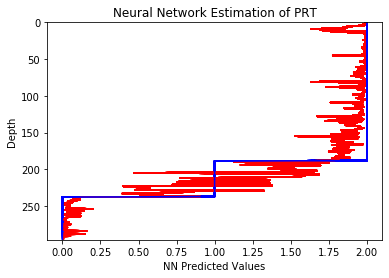

In [23]:
pred_prt = []
prt_known = []
depth = []

for i in range(len(data)):
    point = data[i]

    z = point[0] * w1 + point[1]* w2 + b
    pred = sigmoid(z)
    
    pred_prt.append(pred)
    prt_known.append(point[2])
    depth.append(i)
    
    color = "brown"
    if pred > .25 :
        color = "orange"

    if pred > 1.7 :
        color = "blue"

    
    plt.plot(pred_prt, depth, c = "r")
    plt.plot(prt_known, depth, c = "b")
    plt.xlabel("NN Predicted Values")
    plt.ylabel("Depth")
    plt.title("Neural Network Estimation of PRT")
    plt.ylim(max(depth),min(depth))

### Method 2 - Plot from data loaded in memory:

(296, 0)

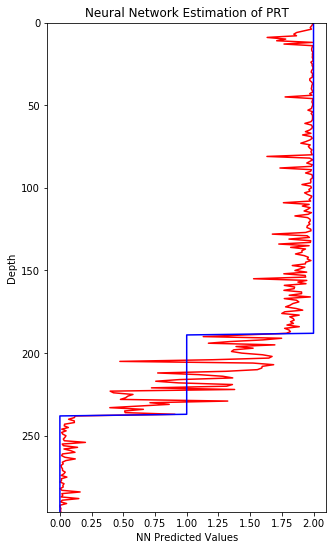

In [14]:
plt.figure(figsize=(5,9))
plt.plot(pred_prt, depth, 'r')
plt.plot(prt_known, depth, 'b')
plt.xlabel("NN Predicted Values")
plt.ylabel("Depth")
plt.title("Neural Network Estimation of PRT")
plt.ylim(max(depth),min(depth))

## Histogram of Sigmoid Predicted Data:

(array([25., 15.,  6.,  2.,  1.,  6.,  1.,  2.,  0.,  1.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  2.,  0.,  1.,  0.,  2.,  0.,  3.,
         1.,  0.,  1.,  0.,  0.,  1.,  1.,  0.,  0.,  1.,  1.,  1.,  1.,
         0.,  0.,  0.,  0.,  1.,  0.,  1.,  1.,  1.,  0.,  0.,  0.,  0.,
         0.,  0.,  1.,  0.,  1.,  0.,  1.,  0.,  1.,  0.,  0.,  0.,  1.,
         2.,  1.,  2.,  4.,  1.,  0.,  1.,  0.,  1.,  0.,  0.,  3.,  1.,
         0.,  2.,  2.,  2.,  1.,  2.,  2.,  1.,  2.,  2.,  9.,  4.,  6.,
         4.,  8.,  6.,  4.,  9., 12., 15., 31., 73.]),
 array([0.0020173 , 0.02197262, 0.04192794, 0.06188326, 0.08183859,
        0.10179391, 0.12174923, 0.14170455, 0.16165987, 0.1816152 ,
        0.20157052, 0.22152584, 0.24148116, 0.26143648, 0.28139181,
        0.30134713, 0.32130245, 0.34125777, 0.36121309, 0.38116842,
        0.40112374, 0.42107906, 0.44103438, 0.4609897 , 0.48094503,
        0.50090035, 0.52085567, 0.54081099, 0.56076631, 0.58072164,
        0.60067696, 0.6206

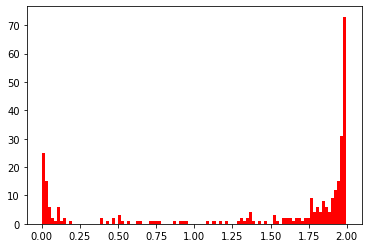

In [15]:
plt.hist(pred_prt, alpha=1, bins=100,color='red')

## Final Depth Plot of RT:

297

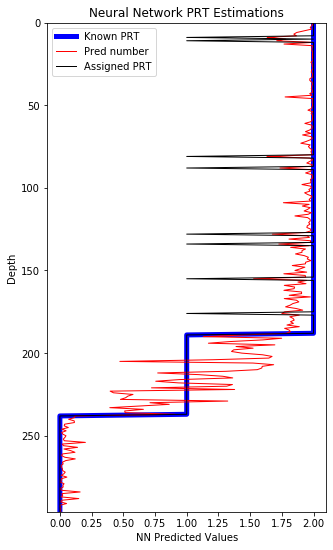

In [22]:
PRT = []

for i in range(len(pred_prt)):
    
    if pred_prt[i] > 1.75:
        PRTpred=2
    elif pred_prt[i] < 0.25:
        PRTpred=0
    else:
        PRTpred=1

    PRT.append(PRTpred)
        
plt.figure(figsize=(5,9))
plt.plot(prt_known, depth, 'b',label = 'Known PRT', linewidth = 5)
plt.plot(pred_prt, depth, c = "r", label='Pred number', linewidth = 1)
plt.plot(PRT, depth, 'k', label = 'Assigned PRT', linewidth = 1)
plt.xlabel("NN Predicted Values")
plt.ylabel("Depth")
plt.title("Neural Network PRT Estimations")
plt.ylim(max(depth),min(depth))
plt.legend()

len(PRT)